# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Load data from local disk

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
# Print out the shape of the loaded data
print('X_train shape is{} and y_train shape is{}'.format(X_train.shape,y_train.shape))
print('X_valid shape is{} and y_valid shape is{}'.format(X_valid.shape,y_valid.shape))
print('X_test shape is{} and y_test shape is{}'.format(X_test.shape,y_test.shape))

X_train shape is(34799, 32, 32, 3) and y_train shape is(34799,)
X_valid shape is(4410, 32, 32, 3) and y_valid shape is(4410,)
X_test shape is(12630, 32, 32, 3) and y_test shape is(12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**



### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
import numpy as np
n_train = X_train.shape[0]
n_validation = valid['features'].shape[0]
n_test = test['features'].shape[0]
image_shape =X_train.shape 
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Average number per class ",int(n_train/n_classes))

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43
Average number per class  809


### Include an exploratory visualization of the dataset
1. Plot Images from all different 43 classes and display them.

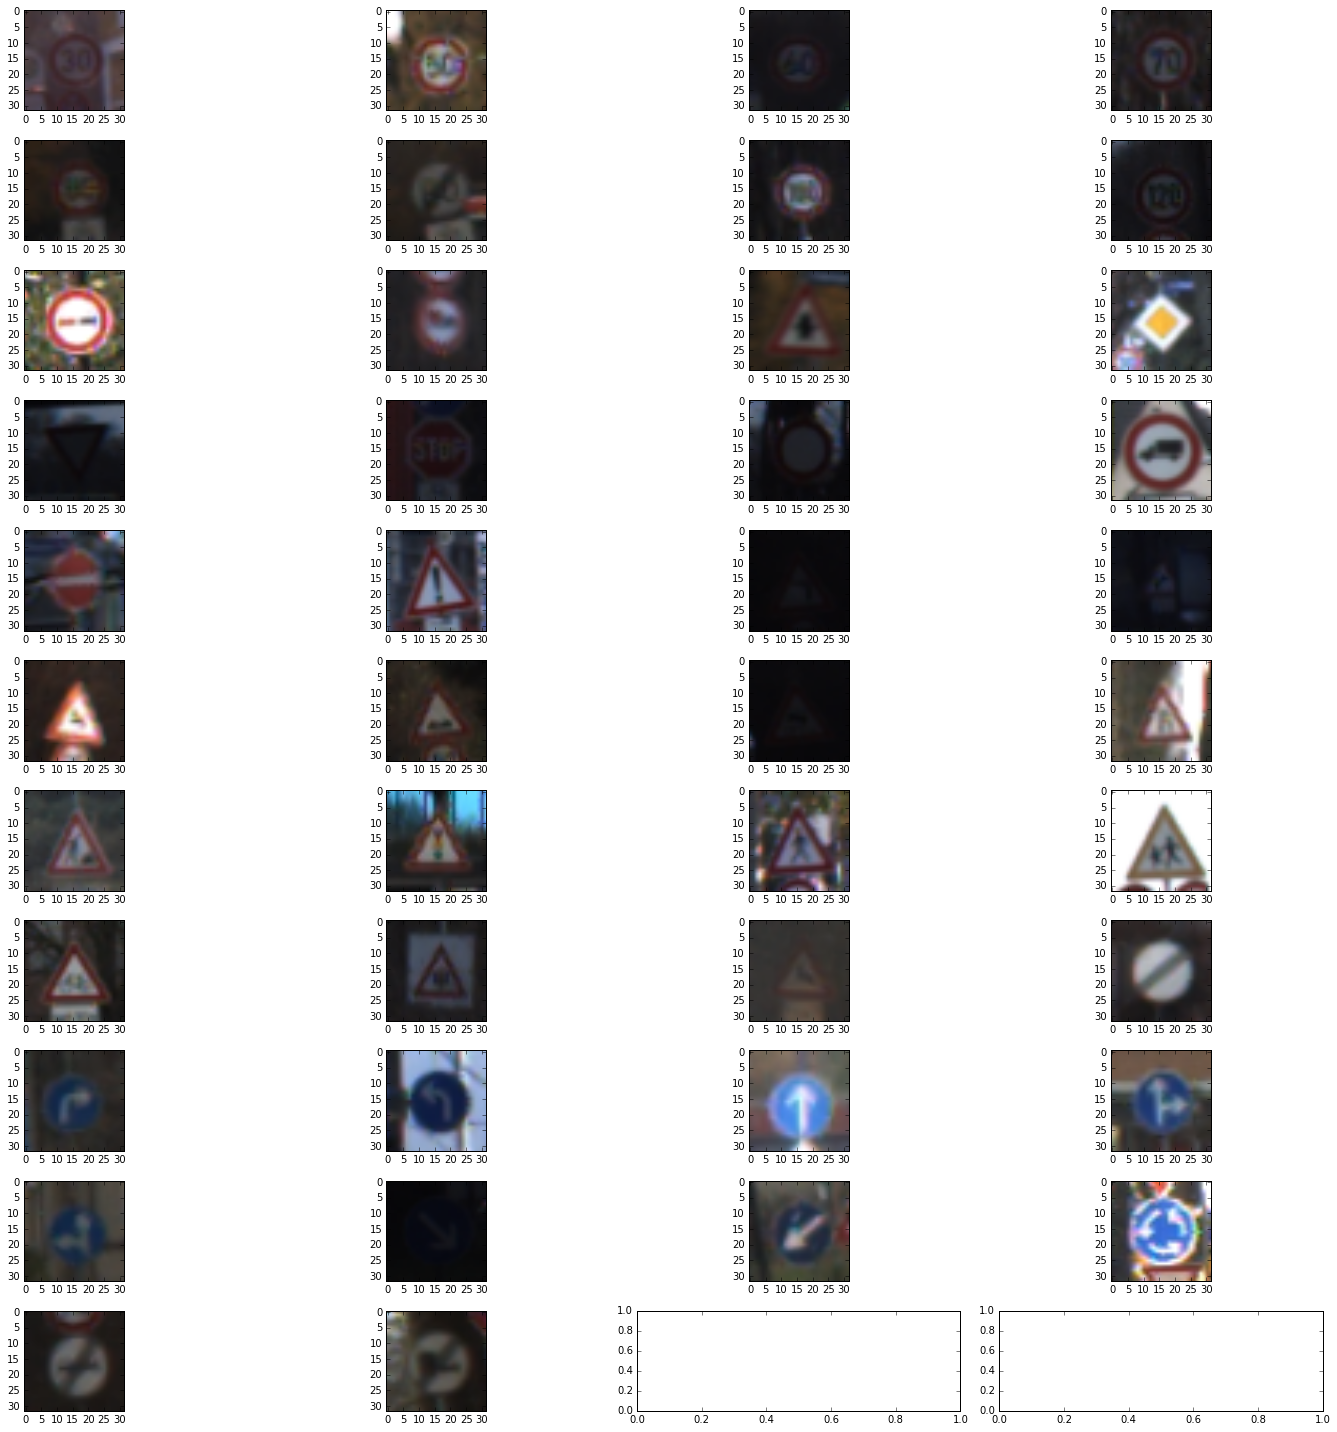

In [4]:
# Plot all the images from the different classes
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Lets plot all images per class
fig, axes=plt.subplots(11,4,figsize=(20,20))
axes=axes.ravel()
for i in range(1,43):
    index=random.randint(0,len(X_train))
    image=X_train[i==y_train]
    image=image[0,:,:]
    axes[i-1].imshow(image)
plt.tight_layout()  

Visualize the distribution of classes

(array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
          360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
          240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
          210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
          300.,   210.,   210.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

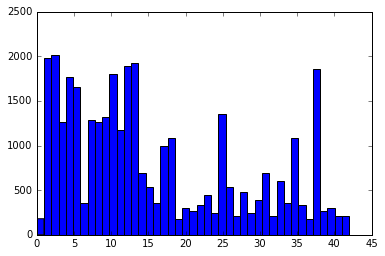

In [5]:
# visualize the distribution of Classes
plt.hist(y_train,bins=n_classes)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).


There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.



### Pre-process the Data Set (Augmenting data, normalization, grayscale, etc.)

Below are the functions to augment the data. Use openCV . Rotate the images and translate the images randomly.
After the augmented data is generated, combine the data with original datset. Apply graycale and normalization techniques on the complete dataset.

In [6]:
# Functions to Augment the Data
import cv2
# Rotate image
def rotate_img(image):
    cols=image.shape[1]
    rows=image.shape[0]
    # Find the center of the image and rotate between 1 and 90 degrees
    center=(cols/2,rows/2)
    angle=np.random.randint(low=1,high=91)
    M=cv2.getRotationMatrix2D(center,angle,1)
    rotate=cv2.warpAffine(image,M,(cols,rows))
    return rotate

# Translate image randomly by +3 or -3 percent 
def image_translate(self, img):
    x = img.shape[0]
    y = img.shape[1]

    x_shift = np.random.uniform(-0.3 * x, 0.3 * x)
    y_shift = np.random.uniform(-0.3 * y, 0.3 * y)
    shift_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    shift_img = cv2.warpAffine(img, shift_matrix, (x, y))
    return shift_img



In [7]:
# Augment the data by calling, rotate and translate image. Lets make each class to a total of 1200 samples
# store additional data in x_train add and y_train add

labels_unique, labels_count = np.unique(y_train, return_counts=True)
X_train_add=[]
y_train_add=[]
data=0

for i in range(0,n_train):
    index=y_train[i]
    count_of_particular_class=labels_count[index]
    if count_of_particular_class>1200:
        pass 
    else:
        needed= 1200-count_of_particular_class
        for n in range(0,needed):
            im_aug=rotate_img(X_train[i])
            X_train_add.append(im_aug)
            y_train_add.append(y_train[i])
            labels_count[index]=1200
            data=data+1
            
print('Data generated total ',data)

Data generated total  22561


In [8]:

X_train_add_array=np.asarray(X_train_add)
y_train_add_array=np.asarray(y_train_add)
print ('X_train new data shape  is{}. and  Y_train new data shape :{} '.format(X_train.shape,X_train_add_array.shape))

X_train_new_2=np.concatenate((X_train,X_train_add_array),axis=0)
y_train_new_2=np.concatenate((y_train,y_train_add_array),axis=0)

X_train=X_train_new_2
y_train=y_train_new_2


print('Y_train final augmented data shape:{} and Y_train new data shape:{}'.format(X_train.shape,y_train.shape))

X_train new data shape  is(34799, 32, 32, 3). and  Y_train new data shape :(22561, 32, 32, 3) 
Y_train final augmented data shape:(57360, 32, 32, 3) and Y_train new data shape:(57360,)


(array([ 1200.,  1980.,  2010.,  1260.,  1770.,  1650.,  1200.,  1290.,
         1260.,  1320.,  1800.,  1200.,  1890.,  1920.,  1200.,  1200.,
         1200.,  1200.,  1200.,  1200.,  1200.,  1200.,  1200.,  1200.,
         1200.,  1350.,  1200.,  1200.,  1200.,  1200.,  1200.,  1200.,
         1200.,  1200.,  1200.,  1200.,  1200.,  1200.,  1860.,  1200.,
         1200.,  1200.,  1200.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

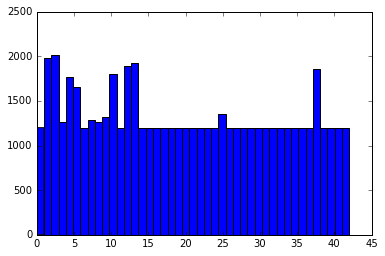

In [9]:
# Now plot the distribution of new classes, each class must be minimu  1200 samples

plt.hist(y_train,bins=n_classes)

In [10]:
# Convert to grayscale

X_train_gray=np.sum(X_train/3,axis=3,keepdims=True)
X_test_gray=np.sum(X_test/3,axis=3,keepdims=True)
X_valid_gray=np.sum(X_valid/3,axis=3,keepdims=True)


In [11]:
# Now apply Normalization
X_train_normalized=(X_train_gray-128)/128
X_valid_normalized=(X_valid_gray-128)/128
X_test_normalized=(X_test_gray-128)/128

# Check dimensions after normalization, should remain same
print('Gray Scale dimensions:{} and Gray scale + Normalized dimensions{}'.format(X_train_gray.shape,X_train_normalized.shape))

Gray Scale dimensions:(57360, 32, 32, 1) and Gray scale + Normalized dimensions(57360, 32, 32, 1)


In [12]:
# Finally reassign the preprocessed to X_train , test and validation
X_train=X_train_normalized
X_test=X_test_normalized
X_validation=X_valid_normalized

In [13]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [27]:
import tensorflow as tf

EPOCHS = 40
BATCH_SIZE = 128


### Model Architecture
I used the classical LeNet architecture , for this project. With the input as 32x32x32 images. It consists of mixed of convolution and pooling layers.The final layer consists of 43 classes.

In [28]:
from tensorflow.contrib.layers import flatten

def LeNet2(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

In [29]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
x_final_test = tf.placeholder(tf.float32, (None, 32, 32, 1))

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

# Training Pipeline

In [30]:
rate = 0.001


logits = LeNet2(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [31]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [32]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        test_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_validation, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Test Accuracy = 0.817
Validation Accuracy = 0.644

EPOCH 2 ...
Test Accuracy = 0.931
Validation Accuracy = 0.768

EPOCH 3 ...
Test Accuracy = 0.958
Validation Accuracy = 0.821

EPOCH 4 ...
Test Accuracy = 0.974
Validation Accuracy = 0.843

EPOCH 5 ...
Test Accuracy = 0.978
Validation Accuracy = 0.847

EPOCH 6 ...
Test Accuracy = 0.985
Validation Accuracy = 0.866

EPOCH 7 ...
Test Accuracy = 0.988
Validation Accuracy = 0.873

EPOCH 8 ...
Test Accuracy = 0.994
Validation Accuracy = 0.883

EPOCH 9 ...
Test Accuracy = 0.993
Validation Accuracy = 0.886

EPOCH 10 ...
Test Accuracy = 0.991
Validation Accuracy = 0.868

EPOCH 11 ...
Test Accuracy = 0.992
Validation Accuracy = 0.894

EPOCH 12 ...
Test Accuracy = 0.995
Validation Accuracy = 0.893

EPOCH 13 ...
Test Accuracy = 0.996
Validation Accuracy = 0.896

EPOCH 14 ...
Test Accuracy = 0.997
Validation Accuracy = 0.907

EPOCH 15 ...
Test Accuracy = 0.989
Validation Accuracy = 0.901

EPOCH 16 ...
Test Accuracy = 0.992
V

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

I used below five images from the web. 30, 60, 70, bicyle , and a STOP sign. The images downloaded from the web were qwin orders of pixels 700 x 700. Hence , I had to resize them to 32 x 32. On resizing these images, I found that these images become heavily blurred and loose the properties. Hence the model may not work very closely on these images.

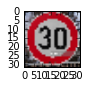

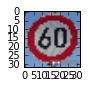

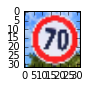

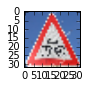

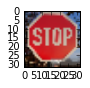

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import cv2
%matplotlib inline

my_data = []
# Display all the images from the locally saved file
for file in sorted(os.listdir("my_Images/")):
    plt.figure(figsize=(1,1))
    img =(mpimg.imread('my_Images/' + file))
    resize_image = cv2.resize(img, (32, 32))
    color_img = cv2.cvtColor(resize_image, cv2.COLOR_BGRA2BGR)
    # Keep appending the images to a new list
    my_data.append(color_img)
    plt.imshow(color_img)  

In [21]:
my_data_array=np.array(my_data)
print('Final shape of my images',my_data_array.shape)

Final shape of my images (5, 32, 32, 3)


In [22]:
my_data_array_gray=np.sum(my_data_array/3,axis=3,keepdims=True)

my_data_array_gray_normalized=(my_data_array_gray-128)/128

my_data=my_data_array_gray_normalized


print('shape of final my_Data',my_data.shape)


shape of final my_Data (5, 32, 32, 1)


### Predict the Sign Type for Each Image

In [23]:
true_class = [1, 3, 4, 29, 14]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    my_accuracy = evaluate(my_data_array_gray_normalized, true_class)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

Test Set Accuracy = 0.200


### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [24]:
#Calculating soft max probabilities

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x:my_data_array_gray_normalized})

for i in range(len(softmax[0])):
    print('Image', i)
    print('SoftMax Probabilities :', softmax[0][i])
    print('Predicted classes :', softmax[1][i])

Image 0
SoftMax Probabilities : [  1.00000000e+00   2.24497740e-10   1.28703017e-17   5.83920585e-23
   3.28454623e-29]
Predicted classes : [ 1  0  4 16 18]
Image 1
SoftMax Probabilities : [  9.99478400e-01   1.77107257e-04   1.59045550e-04   8.81822780e-05
   5.72956233e-05]
Predicted classes : [18 11 24  0  2]
Image 2
SoftMax Probabilities : [  9.93244350e-01   2.60331016e-03   2.06578267e-03   1.78165850e-03
   7.97683970e-05]
Predicted classes : [18 38 25 19  5]
Image 3
SoftMax Probabilities : [  9.73272026e-01   2.66923439e-02   2.51855836e-05   1.00772550e-05
   2.07003865e-07]
Predicted classes : [28 19 35 23 24]
Image 4
SoftMax Probabilities : [ 0.41814911  0.24171838  0.21703774  0.08864107  0.02604282]
Predicted classes : [ 2  1 38 27 36]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [25]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")